In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
df = pd.read_csv('Ecommerce Customers')
df

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
5,alvareznancy@lucas.biz,"645 Martha Park Apt. 611\nJeffreychester, MN 6...",FloralWhite,33.871038,12.026925,34.476878,5.493507,637.102448
6,katherine20@yahoo.com,"68388 Reyes Lights Suite 692\nJosephbury, WV 9...",DarkSlateBlue,32.021596,11.366348,36.683776,4.685017,521.572175
7,awatkins@yahoo.com,Unit 6538 Box 8980\nDPO AP 09026-4941,Aqua,32.739143,12.351959,37.373359,4.434273,549.904146
8,vchurch@walter-martinez.com,"860 Lee Key\nWest Debra, SD 97450-0495",Salmon,33.987773,13.386235,37.534497,3.273434,570.200409
9,bonnie69@lin.biz,"PSC 2734, Box 5255\nAPO AA 98456-7482",Brown,31.936549,11.814128,37.145168,3.202806,427.199385


In [4]:
 # df.groupby('Avatar')['Avatar'].count()

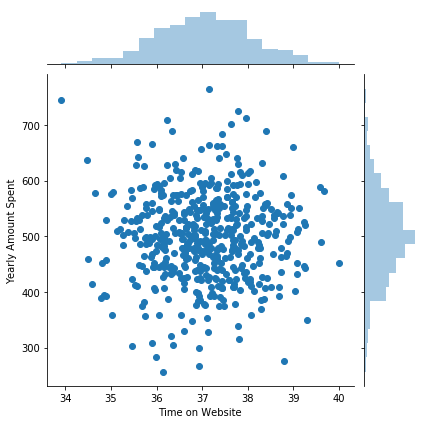

In [5]:
#sns.pairplot(df)
sns.jointplot(df['Time on Website'],df['Yearly Amount Spent'])

In [6]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [7]:
X = df[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

In [8]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [9]:
reg = LinearRegression(n_jobs=-1)

In [10]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [11]:
prediction = reg.predict(X_test)

In [12]:
reg.coef_

array([25.36821309, 38.99461112,  0.14269719, 61.82772351])

In [13]:
pd.DataFrame(data = reg.coef_,index=['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership'],columns=['Coefficient'])

,Coefficient
Avg. Session Length,25.368213
Time on App,38.994611
Time on Website,0.142697
Length of Membership,61.827724


In [14]:
reg.intercept_

-1033.0202302562975

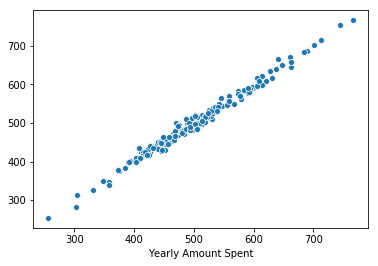

In [15]:
sns.scatterplot(y_test,prediction)

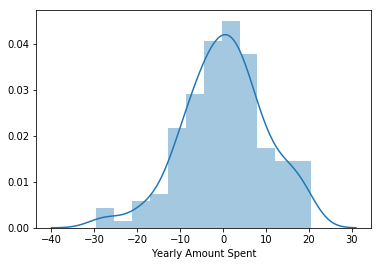

In [16]:
sns.distplot(y_test-prediction)

In [17]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test,prediction))
print("Mean Squared Error:",metrics.mean_squared_error(y_test,prediction))
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,prediction)))

Mean Absolute Error: 7.522298177423046
Mean Squared Error: 93.60447376031863
Root Mean Squared Error: 9.6749405042263
